In [1]:

from layowt.grids import Grid
from layowt.layouts import Layout, geoms_from_shapefile, geoms_from_postgis
import numpy as np
import pandas as pd

c:\Users\GuillermoTornero\OneDrive - Oceanwinds\X - PERSONAL\Python\layOWt\venv\lib\site-packages\py_wake\utils\xarray_utils.py:150: FutureWarning: xarray subclass DataArrayILK should explicitly define __slots__
  class DataArrayILK(DataArray):


In [2]:
areas = geoms_from_shapefile('prototype_inputs/caledonia_area.shp')
exclusions = geoms_from_shapefile('prototype_inputs/OW_Turbine_Exclusion_Areas_Fixed_20220525.shp')

(<Figure size 576x432 with 1 Axes>, <AxesSubplot:>)

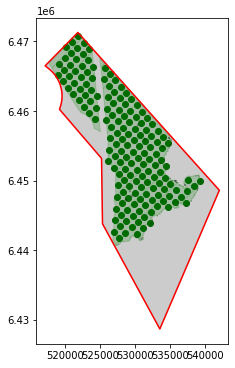

In [3]:
grid = Grid(n_rows=40, n_cols=40, row_step=5, col_step=5, angle=50, origin=(areas[0].centroid.x, areas[0].centroid.y), scale=236)
layout = Layout(grid)
layout.clip_to_area(areas)
layout.avoid_exclusions(exclusions)
layout.plot()

In [14]:
layout.load_wtg("prototype_inputs/NGT260-21MW_Vestas_v3.wtg")
layout.wtg

In [ ]:
layouts = []

for row_step in np.arange(5, 10, 0.25):
    for col_step in np.arange(5, 10, 0.25):
        for angle in np.arange(0, 90, 5):
            grid = Grid(n_rows=40, n_cols=40, row_step=row_step, col_step=col_step, angle=angle, origin=(areas[0].centroid.x, areas[0].centroid.y), scale=236)
            layout = Layout(grid)
            layout.clip_to_area(areas)
            layout.avoid_exclusions(exclusions)
            layouts.append(layout)

In [ ]:
sorted_layouts = sorted(layouts, key= lambda layout: layout.n_wtg, reverse=True)

In [ ]:
sorted_layouts[1].plot()

In [ ]:
n_wtg_list = [(x.n_wtg, x.grid.row_step, x.grid.col_step, x.grid.angle) for x in sorted_layouts]
n_wtg_list

In [ ]:
sorted_layouts[1].to_shapefile(filepath='test_layout.shp', epsg=30, geometry='Point')[]

In [ ]:
pd.DataFrame(sorted_layouts[1].coords).to_clipboard()

In [ ]:
[(x.n_wtg, x.grid.row_step, x.grid.col_step, x.grid.angle) for x in layouts[1300:]]

In [ ]:
grid = Grid(n_rows=40, n_cols=40, row_step=5, col_step=5)
layout = Layout(grid)